# Stock-Data Analysis

## Overview

For this project, I will be assuming the role of a Data Scientist working for a new startup investment firm that helps customers invest their money in stocks. Myr job is to extract financial data like historical share price and quarterly revenue reportings from various sources using Python libraries and webscraping on popular stocks. Subsequently, I visualize the data in a dashboard to identify patterns or trends.

### Stocks to Analyze

+ Microsoft ("MSFT")
+ GameStop
+ Apple ("AAPL")
+ Amazon

## Extracting Stock Data Using the yfinance Library in Python

In [5]:
# Installing the required libraries
#!pip install yfinance==0.2.4
#!pip install pandas


In [26]:
import yfinance as yf
import pandas as pd
import json
import requests

In [33]:
from urllib.request import urlretrieve

In [52]:
# Extracting data for the stocks
apple = yf.Ticker("AAPL")
amd = yf.Ticker("AMD")

In [54]:
# Ticker.info does not work for the time being. We'll have to download the file to access the needed information
urlretrieve("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/apple.json", "apple.json")

('amd.json', <http.client.HTTPMessage at 0x19057d25ac0>)

In [60]:
urlretrieve("https://cf-courses-data.s3.us.cloud-object-storage.appdomain.cloud/IBMDeveloperSkillsNetwork-PY0220EN-SkillsNetwork/data/amd.json", "amd.json")

('amd.json', <http.client.HTTPMessage at 0x19057eced50>)

In [34]:
#loading the json file.
with open("apple.json") as f:
    apple_info = json.load(f)
    
apple_info["country"]

'United States'

In [63]:
with open("amd.json") as g:
    amd_info = json.load(g)

amd_info["sector"]

'Technology'

In [72]:
apple_price_data = apple.history(period="max")

apple_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-12-12,0.099319,0.099750,0.099319,0.099319,469033600,0.0,0.0
1980-12-15,0.094569,0.094569,0.094137,0.094137,175884800,0.0,0.0
1980-12-16,0.087659,0.087659,0.087228,0.087228,105728000,0.0,0.0
1980-12-17,0.089387,0.089818,0.089387,0.089387,86441600,0.0,0.0
1980-12-18,0.091978,0.092410,0.091978,0.091978,73449600,0.0,0.0


In [64]:
amd_price_data = amd.history(period="max")


amd_price_data.head()

,Open,High,Low,Close,Volume,Dividends,Stock Splits
Date,,,,,,,
1980-03-17,0.0,3.302083,3.125000,3.145833,219600,0,0.0
1980-03-18,0.0,3.125000,2.937500,3.031250,727200,0,0.0
1980-03-19,0.0,3.083333,3.020833,3.041667,295200,0,0.0
1980-03-20,0.0,3.062500,3.010417,3.010417,159600,0,0.0
1980-03-21,0.0,3.020833,2.906250,2.916667,130800,0,0.0


## Cleaning and Transforming Saved Data

In [73]:
#Resetting the index
apple_price_data.reset_index(inplace=True)
amd_price_data.reset_index(inplace=True)

## Analyzing and Visualizing the Data

In [78]:
#finding the volume traded on the first day for AMD.

first_day_vol = amd_price_data.loc[0, "Volume"]

first_day_vol

219600

<Axes: xlabel='Date'>

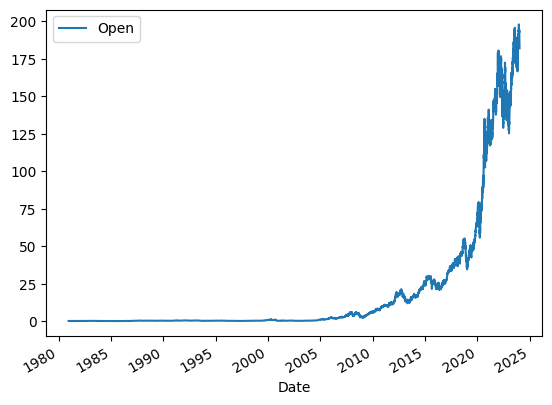

In [43]:
#plotting the open
apple_price_data.plot(x="Date", y="Open")

<Axes: xlabel='Date'>

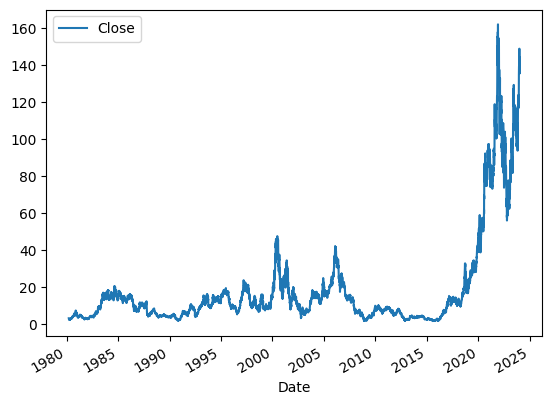

In [75]:
amd_price_data.plot(x="Date", y="Close")

<Axes: xlabel='Date'>

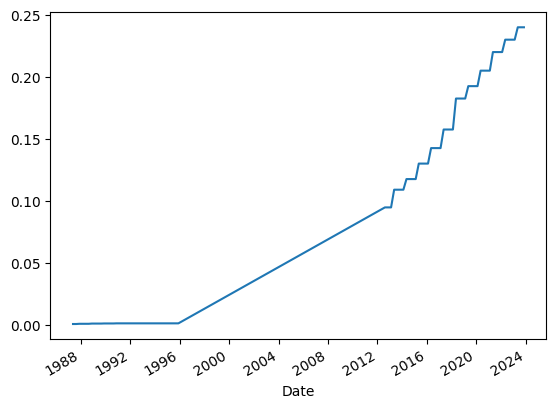

In [51]:
apple_dividends = apple.dividends

apple_dividends.plot()

<Axes: xlabel='Date'>

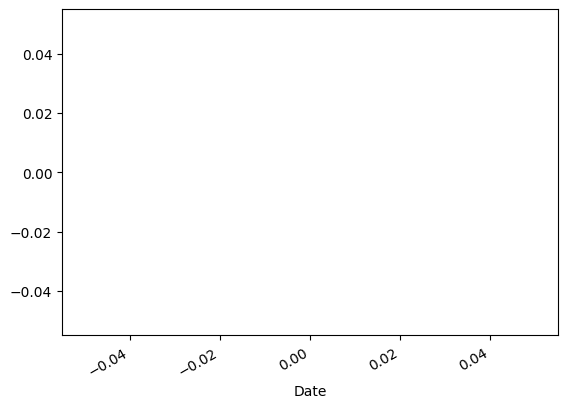

In [76]:
amd_dividends = amd.dividends

amd_dividends.plot()